In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt      
import pandas as pd
from scipy import special                 
import scipy.optimize as opt    
import array
from scipy.signal import find_peaks, peak_prominences, peak_widths
def unPackRawFile(raw_path):
    """
    - unpacks the .raw file. Not used for the neural network.
    """
    y = np.loadtxt(raw_path, skiprows=6)
    distance = y[:,0]
    pec_vel = y[:,1]
    temp = y[:,2]
    HI_density = y[:,3]
    gas_density = y[:,4]
    gas_metallicity = y[:,5]
   
    return distance, pec_vel, temp, HI_density, gas_density, gas_metallicity

In [2]:

def area_under_peak():
    #declare the data that will store the peak location and the area and the lyman limited that are found
    distance_all,pec_val_all,temp_all,HI_density_all,gas_density_all, gas_metallicity_all,area  = [],[],[],[],[],[],[]
    for i in range(1000):
        raw_path = 'los.00' + '{0:03}'.format(i) +'.raw'
        distance, pec_vel, temp, HI_density, gas_density, gas_metallicity = unPackRawFile(raw_path)
        #changing the distance from chimp to cmeters
        distance_cm = distance *0.1452*3.086e24 /0.68
        peak,properties = find_peaks(HI_density)
        mins, properties =find_peaks(HI_density*-1)
        closest_mins = [mins[np.argmin(np.abs(x-mins))] for x in peak]
        
        for k,x in zip(peak,closest_mins): 
            area_under_the_curve = np.multiply(HI_density[k], abs(distance_cm[k]-distance_cm[x]))/0.937415
            if(area_under_the_curve >= (1.6*10**17)and area_under_the_curve  <= (10**20) and HI_density[k]/(gas_density[k]) > 1e-4):
                distance_all.append(distance[k]),pec_val_all.append(pec_vel[k]),temp_all.append(temp[k]),HI_density_all.append(HI_density[k]),gas_density_all.append(gas_density[k]),gas_metallicity_all.append(gas_metallicity[k]),area.append(area_under_the_curve)
    return distance_all,pec_val_all,temp_all,HI_density_all,gas_density_all, gas_metallicity_all,area
distance_all,pec_val_all,temp_all,HI_density_all,gas_density_all, gas_metallicity_all,area = area_under_peak()


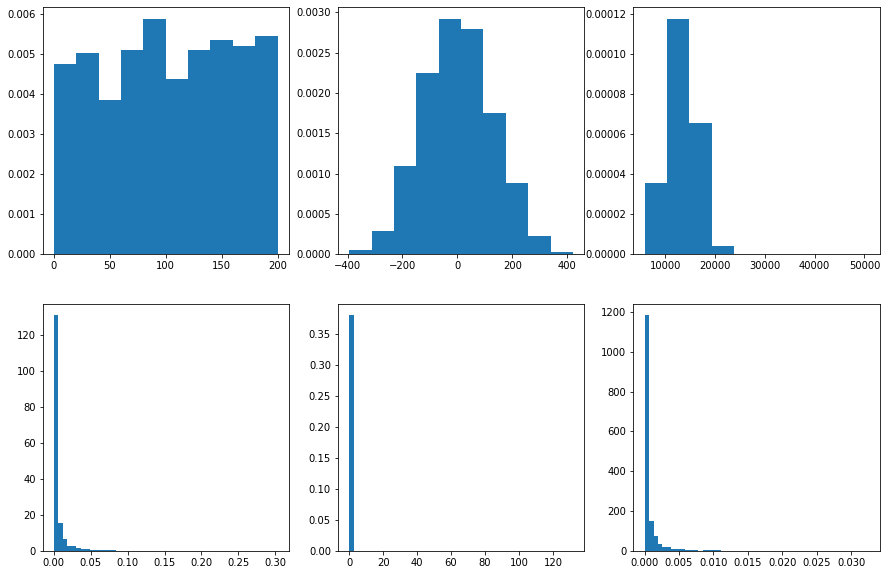

In [3]:
fig, axes = plt.subplots(2, 3,figsize=(15,10))
ax = axes[0][0]
ax.hist(distance_all,density= True, bins =10);
ax = axes[0][1]
ax.hist(pec_val_all,density = True, bins =10);
ax = axes[0][2]
#hot temperature filtered out
ax.hist(temp_all,density = True, bins =10);
ax = axes[1][0]
ax.hist(HI_density_all,density = True, bins =50);
ax = axes[1][1]
ax.hist(gas_density_all,density = True, bins =50);
ax = axes[1][2]
ax.hist(gas_metallicity_all,density = True, bins =50);

Text(0.5, 1.0, 'gas_density vs HI_density with gas_metallicity as color')

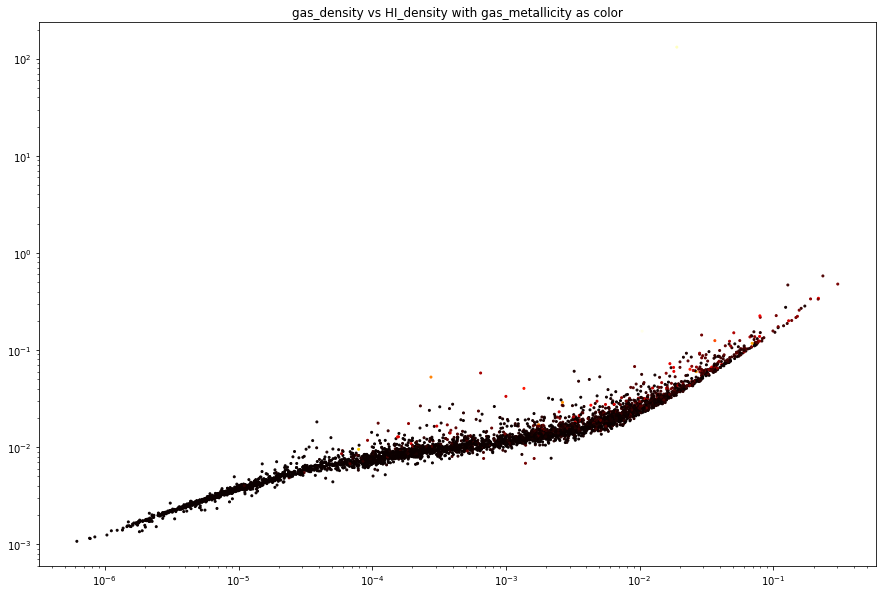

In [17]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111) 
ax.scatter(HI_density_all,gas_density_all,c = gas_metallicity_all,cmap="hot",s=4)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("gas_density vs HI_density with gas_metallicity as color")

In [5]:
def calculate_gamma(temperature,density,xHI,scale):
    '''Gamma = R(T)*ne/xHI, R(T) = 4.3e-13 * (T/1e4K)^{-0.7), ne = 0.82*nb.
    '''
    omega_b = 0.0479; h = 0.6814
    mean_nb = 1.123e-5/scale**3*omega_b*h**2
    nb = np.multiply(density ,mean_nb); ne = 0.82*nb
    R_T = 4.3e-13 * (np.divide(temperature,1e4))**(-0.7)
    gamma =R_T * ne/ xHI
    
    return gamma

In [6]:
sigma = 6.3e-18
optical_depth = np.multiply(sigma,area)

In [7]:
gamma_all = []
gamma_all = calculate_gamma(temp_all,gas_density_all,np.divide(HI_density_all,gas_density_all),0.1452)

In [8]:
def average_gamma(gamma):
    average = 0
    for i in (gamma):
        average += i
    average = average/(len(gamma))
    return average
average = average_gamma(gamma_all)
average


2.034025474859699e-15

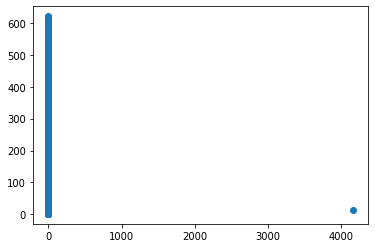

In [9]:
plt.scatter(gamma_all/average,optical_depth)

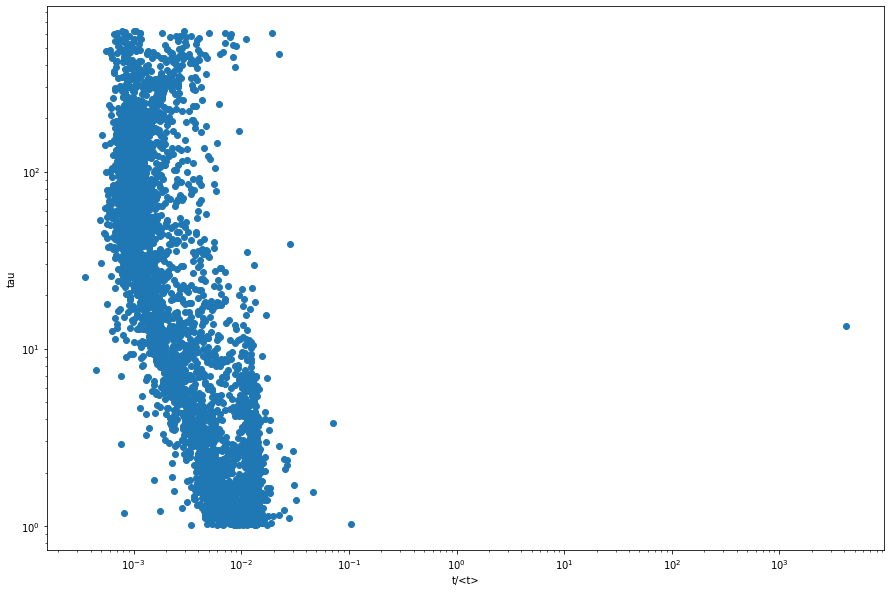

In [10]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.set_xlabel("t/<t>")
ax.set_ylabel("tau")
ax.set_xscale("log")
ax.set_yscale("log")
ax.scatter(gamma_all/average,optical_depth)

Text(0.5, 1.0, 'gas_density vs HI_density with gamma as color')

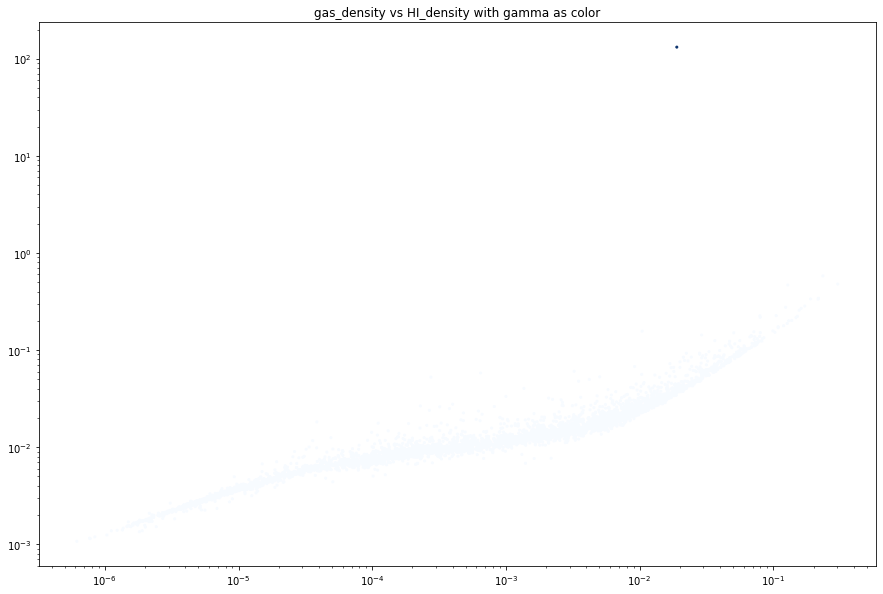

In [18]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111) 
ax.scatter(HI_density_all,gas_density_all,c = gamma_all/average,cmap="Blues",s=4)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("gas_density vs HI_density with gamma as color")

Text(0.5, 1.0, 'gas_density vs temperature')

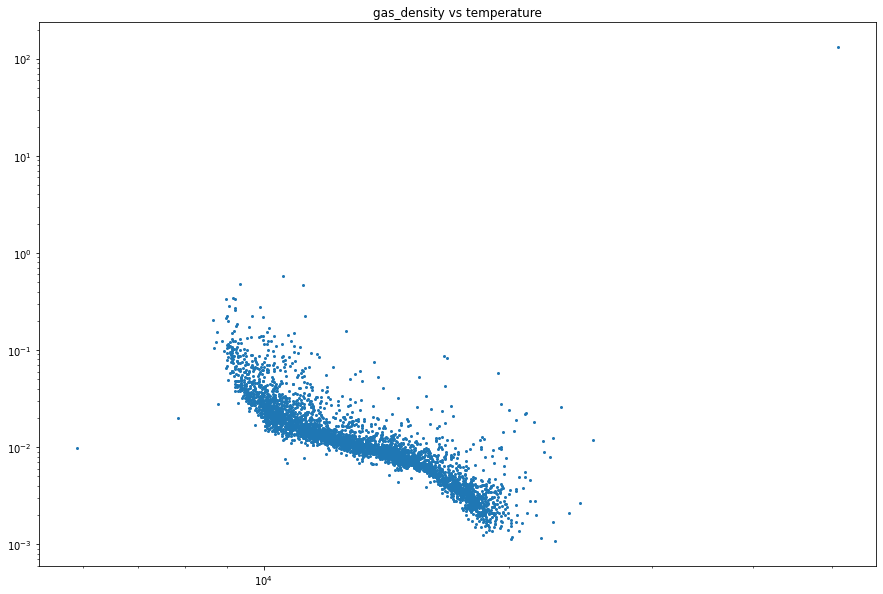

In [12]:
#temperature density relation
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111) 
ax.scatter(temp_all,gas_density_all,cmap="hot",s=4)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("gas_density vs temperature")

3.927861725040382e-07


Text(0.5, 1.0, 'gas_density vs temperature')

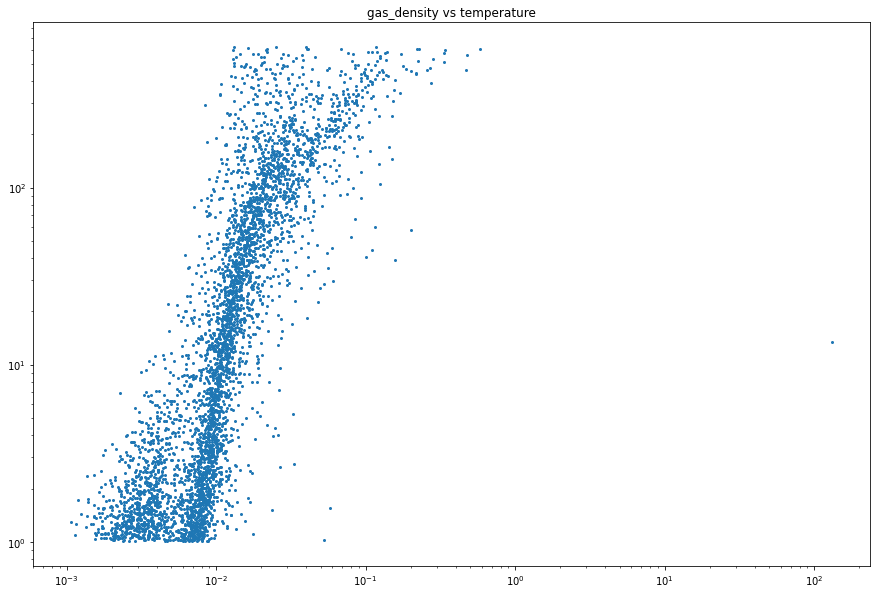

In [13]:
#temperature density relation
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111) 
ax.scatter(gas_density_all,optical_depth,cmap="hot",s=4)
fit = np.polyfit(optical_depth,gas_density_all,2)
print(fit[0])
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("gas_density vs temperature")